<a href="https://colab.research.google.com/github/yh08037/gnbai20201/blob/master/lab2/gnbai_lab2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GnB AI Project Assignment
## Lab 2: Regularized Regression


### Tasks
1. data_lab2.txt의 데이터를 읽고, train 데이터 70%, test 데이터 30%로 분할하여라.
2. 다음의 가설 함수들에 대해 파라미터의 최적값을 구하여라.
    
    (비정규화 회귀는 최소 제곱법, 정규화 회귀는 closed-form solution 사용)
    
    * 비정규화 회귀 – 선형 모델
    * 비정규화 회귀 – 2차 다항식 모델
    * 비정규화 회귀 – 5차 다항식 모델
    * 정규화 회귀 – 5차 다항식 모델 (Ridge)

3. train 데이터 위에 학습된 회귀자들을 plot하고, train error를 구하여라.
4. test 데이터 위에 학습된 회귀자들을 plot하고, test error를 구하여라

### Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Train-test split

In [332]:
# pandas를 통해 txt 파일 읽어오기
name_file = './new.txt'
columns = ['x', 'y']

data_pd = pd.read_csv(name_file, names=columns, sep='\t')

print(data_pd)

         x       y
0     2.94  34.340
1     3.06  34.520
2     3.07  34.318
3     3.16  34.360
4     3.26  34.490
..     ...     ...
195  16.10  33.770
196  16.14  33.808
197  16.52  33.851
198  16.82  33.953
199  17.10  33.950

[200 rows x 2 columns]


In [333]:
# pandas dataframe을 numpy array로 변환
data_np = data_pd.values

# data_pd는 더이상 필요하지 않으므로 메모리를 비워줍니다.
del data_pd

# 데이터의 순서를 랜덤으로 섞기
np.random.shuffle(data_np)

# 처음과 끝의 5개의 데이터를 출력
print(data_np[:5])
print('...')
print(data_np[-5:])

[[ 9.86  33.494]
 [ 6.28  34.114]
 [ 4.52  34.28 ]
 [ 5.7   34.43 ]
 [11.74  33.265]]
...
[[16.14  33.808]
 [ 4.12  34.268]
 [ 4.89  33.991]
 [10.01  34.23 ]
 [11.78  32.88 ]]


In [334]:
# train set과 test set의 크기를 결정
data_size = len(data_np)

train_size = int(data_size * 0.7)
test_size = data_size - train_size

# train-test set 나누기
x_train = data_np[:train_size, 0].reshape(-1, 1)
y_train = data_np[:train_size, 1].reshape(-1, 1)

x_test = data_np[-test_size:, 0].reshape(-1, 1)
y_test = data_np[-test_size:, 1].reshape(-1, 1)

# data_np도 더이상 필요하지 않으므로 메모리를 비워줍니다.
del data_np

print("shape of x_train :", x_train.shape)
print("shape of y_train :", y_train.shape)
print("shape of x_test :", x_test.shape)
print("shape of y_test :", y_test.shape)

shape of x_train : (140, 1)
shape of y_train : (140, 1)
shape of x_test : (60, 1)
shape of y_test : (60, 1)


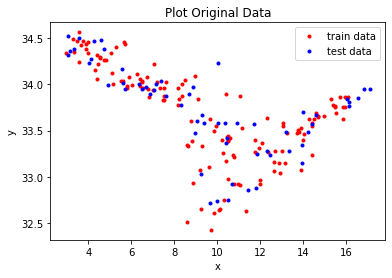

In [335]:
# data plot하기
plt.title('Plot Original Data')
plt.plot(x_train, y_train, 'r.', label='train data')
plt.plot(x_test, y_test, 'b.', label='test data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Finding optimal parameters

#### 모델 정의

1. 비정규화 회귀 – 선형 모델
    
    $h_\theta^{(1)}(x)=\theta_0+\theta_1x_1 \quad\quad\quad\quad\quad\quad \left(x_1=x\right)$

2. 비정규화 회귀 – 2차 다항식 모델
    
    $h_\theta^{(2)}(x)=\theta_0+\theta_1x_1+\theta_2x_2 \quad\quad\quad \left(x_2=x^2\right)$

3. 비정규화 회귀 – 5차 다항식 모델
    
    $h_\theta^{(3)}(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5$

4. 정규화 회귀 – 5차 다항식 모델 (Ridge)
    
    $h_\theta^{(4)}(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5$


##### 각 모델들의 x 행렬
$
X^{(h^{(1)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} \\
    1 & x_1^{(2)} \\
    \vdots & \vdots \\
    1 & x_1^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(2)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} \\
    1 & x_1^{(2)}& x_2^{(2)} \\
    \vdots & \vdots & \vdots \\
    1 & x_1^{(I)}& x_2^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(3)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & \cdots & x_5^{(1)} \\
    1 & x_1^{(2)}& \cdots & x_5^{(2)} \\
    \vdots & \vdots &  & \vdots \\
    1 & x_1^{(I)}& \cdots & x_5^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(4)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & \cdots & x_5^{(1)} \\
    1 & x_1^{(2)}& \cdots & x_5^{(2)} \\
    \vdots & \vdots &  & \vdots \\
    1 & x_1^{(I)}& \cdots & x_5^{(I)} \\
  \end{bmatrix}
$


In [336]:
# 1. 비정규화 선형 회귀: x1_train

# 2. 비정규화 2차 회귀: x2_train

# 3. 비정규화 5차 회귀: x3_train

# 4. 정규화 5차 회귀: x4_train

# x1_train, x2_train, x3_train, x4_train의 shape 출력


shape of x1_train :  (140, 2)
shape of x2_train :  (140, 3)
shape of x3_train :  (140, 6)
shape of x4_train :  (140, 6)


In [337]:
# 1. 비정규화 선형 회귀: x1_test

# 2. 비정규화 2차 회귀: x2_test

# 3. 비정규화 5차 회귀: x3_test

# 4. 정규화 5차 회귀: x4_test

# x1_test, x2_test, x3_test, x4_test의 shape 출력


shape of x1_test :  (60, 2)
shape of x2_test :  (60, 3)
shape of x3_test :  (60, 6)
shape of x4_test :  (60, 6)


#### 2) Finding parameters
1. 비정규화 회귀 모델의 최소 제곱법에 의한 
    
    $\theta^*=\left(x^Tx\right)^{-1}x^Ty$

2. Ridge 정규화 회귀 모델의 닫힌 형태의 해
    
    $\theta^*=\left(x^Tx+\lambda  
        \begin{bmatrix}
            0 & 0 & \cdots & 0 \\
            0 & 1 & \cdots & 0 \\
            \vdots & \vdots & \ddots & \vdots \\
            0 & 0 & \cdots & 1 \\
        \end{bmatrix}
    \right)^{-1}x^Ty$

In [338]:
# 1. 비정규화 선형 회귀: theta1

# 2. 비정규화 2차 회귀: theta2

# 3. 비정규화 5차 회귀: theta3

# 4. 정규화 5차 회귀: theta4
Lambda = 0.2

# theta값 출력


theta 1
[[34.39505949]
 [-0.07533266]]

theta 2
[[ 3.60254438e+01]
 [-4.74934926e-01]
 [ 2.07749766e-02]]

theta 3
[[ 3.60291532e+01]
 [-1.31039105e+00]
 [ 4.09532558e-01]
 [-6.13456821e-02]
 [ 3.99206593e-03]
 [-9.20097009e-05]]

theta 4
[[ 3.42751411e+01]
 [-1.45890929e-01]
 [ 1.24736627e-01]
 [-2.89139293e-02]
 [ 2.25361137e-03]
 [-5.65873471e-05]]


## 3. Plot training data with fitted curve

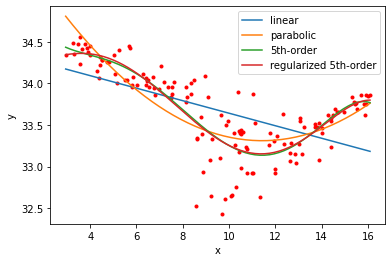

In [340]:
# 데이터의 순서를 shuffle했기 때문에 
# 데이터의 순서대로 plot하면 정상적으로 그려지지 않으므로
# 일정한 간격으로 오름차순의 구간을 만들어주는 np.linspace 사용

# x_train의 최솟값부터 최댓값까지 128등분
x = np.linspace(min(x_train), max(x_train), 128)

# train data와 regressor 함께 plot하기


## 4. Compute traing errors

In [0]:
def MSE(y_hat, y):
    result = 0.
    # result 값을 완성해보세요!

    return result

In [0]:
def get_error(theta_n, x_n, y):

    # 임의의 회귀 모델의 입력 x_n과
    # 계산한 파라미터 theta_n으로
    # y_hat 행렬을 구해보세요!

    return MSE(y_hat, y)

In [343]:
# get_error() 함수로 4개의 모델의 train error 구하기

# train error 출력하기


0.16174670571731828
0.08707737514247565
0.06805998615813516
0.06835061826397691


## 5. Plot test data with fitted curve

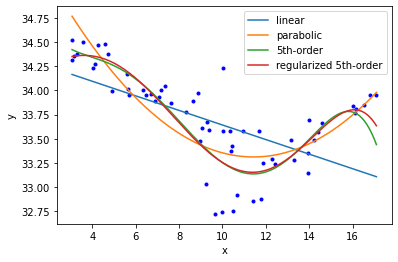

In [344]:
# x_test의 최솟값부터 최댓값까지 128등분

# test data와 regressor 함께 plot하기


## 6. Compute test errors

In [345]:
# get_error() 함수로 4개의 모델의 test error 구하기

# test error 출력하기


0.1448367531965667
0.07635505594328136
0.06973295191563432
0.06616327050722977
